Load Data + Cleaning

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

imgPath = "TRSynth100K/images"
labelPath = "TRSynth100K/labels.txt"
finalDataPath = "img_data.csv"

labels = pd.read_table(labelPath, header = None)

In [2]:
labels.head()

,0
0,life
1,not
2,while
3,know
4,clearly


In [3]:
labels.shape

(100000, 1)

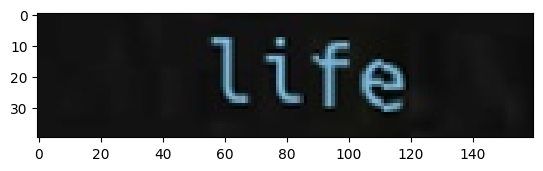

In [4]:
img = plt.imread(os.path.join(imgPath, "00000000.jpg"))
plt.imshow(img)

In [5]:
labels.isna().sum()

0    6
dtype: int64

In [6]:
labels[labels[0].isna()]

,0
17672,NaN
19198,NaN
33301,NaN
57410,NaN
74347,NaN
77150,NaN


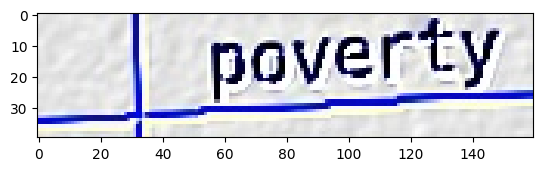

In [7]:
# Box used for taking a look at the six images to fix labels.

img = plt.imread(os.path.join(imgPath, "00077510.jpg"))
plt.imshow(img)

In [8]:
labels[0][17672] = "None"
labels[0][19198] = "null"
labels[0][33301] = "None"
labels[0][57410] = "None"
labels[0][74347] = "null"
labels[0][77150] = "poverty"
labels[labels[0].isna()]

,0


In [9]:
imgs = os.listdir(imgPath)
imgs.sort()
imgs = [imgPath + "/" + i for i in imgs]

In [10]:
imgData = pd.DataFrame({"image": imgs, "text": labels[0].values.tolist()})

Save Finalized Data to CSV File

In [11]:
imgData.to_csv(finalDataPath, index = False)